# Students and Alcohol Consumption

### Context
[Kaggle’s Student Alcohol Consumption survey](https://www.kaggle.com/uciml/student-alcohol-consumption#student-por.csv) was conducted among students at Gabriel Pereira and Mousinho da Silveira secondary school in Porto, Portugal. Students in math and Portuguese language courses were selected to participate in the data collection. The survery contains various social, gender, and study information about students in regards to predicting their final grade.

Since this dataset consists of two parts, math and Portuguese language courses, we will merge together the files and examine it as one set. There are 382 students that belong to both datasets so we will join the files without overlapping data points. We will also assume that this dataset is a representative sample of the entire student population among the schools and each variable is independent of each other. 


In [1]:
# Libraries

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [2]:
# Load and merge math and Portuguese language course files 

d1 = pd.read_csv('student-mat.csv')
d2 = pd.read_csv("student-por.csv")

data = pd.merge(d1, d2, how='outer', on=["school","sex","age","address","famsize","Pstatus","Medu",
                                         "Fedu","Mjob","Fjob","reason","nursery","internet","guardian",
                                         "traveltime","studytime","famsup","activities","higher","romantic",
                                         "famrel","freetime","goout","Dalc","Walc","health","schoolsup"])


In [54]:
# Convert selected features from numeric to category type

data['school'] = data.school.astype('str')
data['sex'] = data.sex.astype('str')
data['traveltime'] = data.traveltime.astype('str')
data['studytime'] = data.studytime.astype('str')
data['health'] = data.health.astype('str')

data['school'] = data.school.astype('category')
data['sex'] = data.sex.astype('category')
data['traveltime'] = data.traveltime.astype('category')
data['studytime'] = data.studytime.astype('category')
data['health'] = data.health.astype('category')

### Sample of Dataset

In [39]:
display(data.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G1_x,G2_x,G3_x,failures_y,paid_y,absences_y,G1_y,G2_y,G3_y,Talc
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,5.0,6.0,6.0,0.0,no,4.0,0.0,11.0,11.0,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5.0,5.0,6.0,0.0,no,2.0,9.0,11.0,11.0,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,7.0,8.0,10.0,0.0,no,6.0,12.0,13.0,12.0,5
3,GP,F,15,U,GT3,T,4,2,health,services,...,15.0,14.0,15.0,0.0,no,0.0,14.0,14.0,14.0,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,6.0,10.0,10.0,0.0,no,0.0,11.0,13.0,13.0,3


There are 33 attributes to the dataset. A few features that will be explore later include: <br>

__school__: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)<br>
__sex__ : Student's sex (binary: 'F' - female or 'M' - male)<br>
__age__ : Student's age (numeric: from 15 to 22)<br>
__address__ : Student's home address type (binary: 'U' - urban or 'R' - rural)<br>
__traveltime__ : home to school travel time (category: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)<br>
__studytime__ : weekly study time (category: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)<br>
__Dalc__ : Weekday alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
__Walc__ : Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)<br>
__health__ : current health status (category: from 1 - very bad to 5 - very good)<br>

### Exploring the schools 

In [55]:
# Gabriel Pereira Secondary School Statistics

GP_stud = data[(data.school == 'GP')]
GP_trim = GP_stud.loc[:,["school","sex","age", "address","traveltime", "studytime","Dalc","Walc","health"]]

GP_trim.describe(include='category')


,school,sex,traveltime,studytime,health
count,441,441,441,441,441
unique,1,2,4,4,5
top,GP,F,1,2,5
freq,441,247,295,215,170


In [56]:
# Mousinho da Silveira Secondary School Statistics

MS_stud = data[(data.school == 'MS')]
MS_trim = MS_stud.loc[:,["school","sex","age", "address","traveltime", "studytime","Dalc","Walc","health"]]

MS_trim.describe(include='category')

,school,sex,traveltime,studytime,health
count,233,233,233,233,233
unique,1,2,4,4,5
top,MS,F,2,2,5
freq,233,149,107,103,85


This survey consists of 674 students, 65% of students from Gabriel Pereira Secondary School and 35% of students from Mousinho da Silveira Secondary School. Both the schools have a higher amount of female than male students, 56% females at Gabriel Pereira and 64% females at Mousinho da Silveira. Students attending Mousinho da Silveira Secondary School appear to have a longer commute to school, averaging around 15 minutes while students at Gabriel Pereira travel less than 15 minutes. Students at both schools average in about 2 to 5 hours per week of study time. Students from both schools identified as being very healthy.

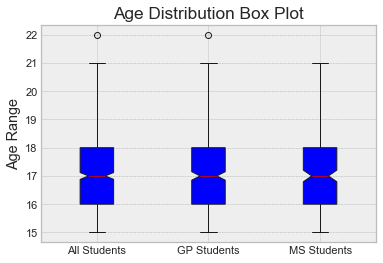

In [57]:
# Plot age distribution 

all= data.age
GP= GP_stud.age
MS=MS_stud.age

box_plot_data=[all,GP,MS]
plt.title('Age Distribution Box Plot')
plt.ylabel('Age Range')
plt.boxplot(box_plot_data,notch='True',patch_artist=True,labels=['All Students','GP Students','MS Students'])
plt.show()

According to the box plot, the population age ranges from 15 to 22 years old. The median age for both schools is approximately 17 years old. There does appear to be one outlier, a 22 years old student at GP. This would skew the distribution towards the older age range. 

### Let's take a look at characteristics of alcohol consumption during weekdays and weekends



Weekday (Dalc) and weekend alcohol consumption (Walc) are measured on a numeric scale from 1 (very low) to 5 (very high). In order to better conceptualize the value of each number, we will convert the numeric scale to categorical groups. 

In [44]:
# Convert Alcohol consumption level 
l = [2,4,6,8,10]
labels="Very Low","Low","Moderate","High","Very High"

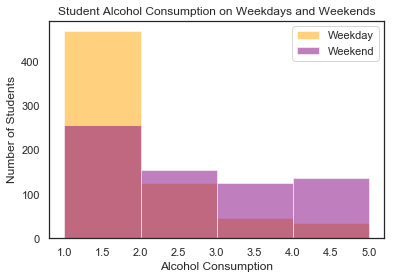

In [79]:
# Comparing Student Alcohol Consumption on Weekdays and Weekends
x = data.Dalc
y = data.Walc


plt.hist(x, color='orange',bins=np.arange(1, 6), alpha=.5) 
plt.hist(y, color='purple',bins=np.arange(1, 6), alpha=.5)
plt.title('Student Alcohol Consumption on Weekdays and Weekends')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Number of Students')
plt.legend(['Weekday','Weekend'])

plt.show()


As shown above, most students consume very low levels of alcohol throughout the week. There does appear to be an increase of alcohol consumption during weekends.  For example, the number of students who consume moderate to very high level of alcohol double from weekdays to weekends.

### Which age group has the highest alcohol consumption during weekdays or weekends?


In [58]:
# Create age groups
age15=data[(data.age==15)]
age16=data[(data.age==16)]
age17=data[(data.age==17)]
age18=data[(data.age==18)]
age19=data[(data.age==19)]
age20=data[(data.age==20)]
age21=data[(data.age==21)]
age22=data[(data.age==22)]

In [59]:
d= {"Feature": ["All Students","Age 15","Age 16","Age 17","Age 18", "Age 19", "Age 20", "Age 21","Age 22"],
    "Count": [data.shape[0],age15.shape[0],age16.shape[0],age17.shape[0],age18.shape[0],age19.shape[0],
              age20.shape[0],age21.shape[0],age22.shape[0]],
    "Average Working Day Alcohol Consumption": [data.Dalc.mean(),age15.Dalc.mean(),age16.Dalc.mean(),
                                                age17.Dalc.mean(),age18.Dalc.mean(),age19.Dalc.mean(),
                                                age20.Dalc.mean(),age21.Dalc.mean(),age22.Dalc.mean()],
    "Average Weekend Alcohol Consumption": [data.Walc.mean(),age15.Walc.mean(),age16.Walc.mean(),
                                            age17.Walc.mean(),age18.Walc.mean(),age19.Walc.mean(),
                                            age20.Walc.mean(),age21.Walc.mean(),age22.Walc.mean()]}

df=pd.DataFrame(d)

In [60]:
df

,Feature,Count,Average Working Day Alcohol Consumption,Average Weekend Alcohol Consumption
0,All Students,674,1.500000,2.278932
1,Age 15,113,1.380531,2.026549
2,Age 16,179,1.396648,2.234637
3,Age 17,180,1.550000,2.433333
4,Age 18,145,1.551724,2.379310
5,Age 19,45,1.644444,2.044444
6,Age 20,8,1.625000,2.625000
7,Age 21,3,3.000000,2.000000
8,Age 22,1,5.000000,5.000000


Based on the average of alcohol consumption during weekdays, age 22 has the highest consumption level with 5.0. However, the mean might not be the most accurate way to answering the question since there is only one student who is 22 years old.

If we disregard age group 22 as an outlier, age group 21 consumes the highest level of alcohol on weekdays with a mean level of 3.0. Meanwhile, students in age group 17 consume the most alcohol during weekends with an average consumption level of 2.4.


#### Next, we will combine weekdays and weekends alcohol consumption to explore weekly drinking habits

In [61]:
# Create total alcohol consumption
data['Talc'] = data.Dalc + data.Walc

#### We will combine age groups to create 3 new groups and compare the consumption level 
New groups consists of the following:
>__mid teens__: ages 15 and 16<br>
>__late teens__: ages 17 and 18<br>
>__adult__: ages 19 to 22 

In [62]:
# Create new age groups

mid_teens = data[((data.age > 14) & (data.age < 17))]
late_teens = data[((data.age > 16) & (data.age < 19))]
adult = data[((data.age > 18) & (data.age < 23))]

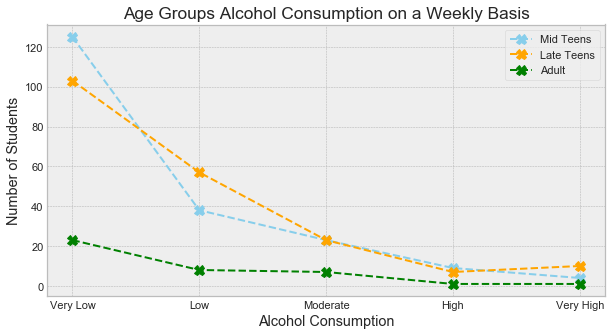

In [63]:

mid_teens = list(map(lambda l: list(mid_teens.Talc).count(l),l))
late_teens = list(map(lambda l: list(late_teens.Talc).count(l),l))
adult = list(map(lambda l: list(adult.Talc).count(l),l))

plt.style.use("bmh")
plt.figure(figsize=(10,5))
plt.plot(labels,mid_teens,color="skyblue",linestyle="--",marker="X", markersize=10,label="Mid Teens")
plt.plot(labels,late_teens,color="orange",linestyle="--",marker="X", markersize=10,label="Late Teens")
plt.plot(labels,adult,color="green",linestyle="--",marker="X", markersize=10,label="Adult")
plt.title("Age Groups Alcohol Consumption on a Weekly Basis")
plt.xlabel("Alcohol Consumption")
plt.ylabel("Number of Students")
plt.legend()


plt.show()

Mid and late teens drinking patterns appears to undergo the most drastic change from very low to high alcohol consumption. Most of students in their mid and late teens are relatively light drinkers with a few exceptions. In contrast, the adult age group alcohol consumption level is more stagnant than other age groups. Majority of the adult group identified as light drinkers while the other half consumes a moderate to high amount of alcohol on a weekly basis.<br>

Base on the quantity of heavy drinkers, students in the late teens age group out number other groups. However, if we were to compare high and low levels of consumption within the age groups, the adult age group have proportionally higher amounts of heavy drinkers than the rest.


### Which gender consumes more alcohol weekly?

In [64]:
# Create geneders

female=data[data.sex=="F"]
male= data[data.sex=="M"]

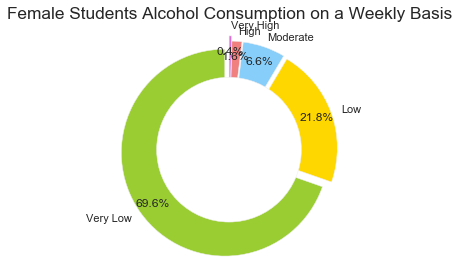

In [65]:
female= list(map(lambda l: list(female.Talc).count(l),l))

colors='yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orchid'

fig1, ax1 = plt.subplots()

#explsion
explode = (0.05,0.05,0.05,0.05,0.1)

ax1.pie(female, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.title("Female Students Alcohol Consumption on a Weekly Basis")

# Draw a circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal') 
plt.tight_layout()
plt.show()


##### Female Students Alcohol Consumption on a Weekly Basis
>__Very Low__: 69.6%<br>
>__Low__: 21.8%<br>
>__Moderate__: 6.6%<br>
>__High__: 1.6%<br>
>__Very High__: 0.4%<br>



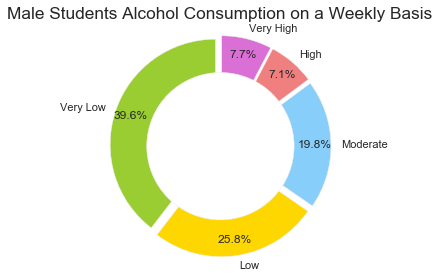

In [66]:
male= list(map(lambda l: list(male.Talc).count(l),l))

colors='yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orchid'

fig1, ax1 = plt.subplots()

#explsion
explode = (0.05,0.05,0.05,0.05,0.05)

ax1.pie(male, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.title("Male Students Alcohol Consumption on a Weekly Basis")

# Draw a circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal') 
plt.tight_layout()
plt.show()

##### Male Students Alcohol Consumption on a Weekly Basis
>__Very Low__: 39.6%<br>
>__Low__: 25.8%<br>
>__Moderate__: 19.8%<br>
>__High__: 7.1%<br>
>__Very High__: 7.7%<br>

Base on the graphs above, female students generally consume lower amounts of alcohol than male students throughout the week. While 90% of females identified themselves as light drinkers, approximately 65% of male students have a low intake of alcohol on a weekly basis. 

### Do students in ubran areas consume more alcohol than those who live in rural areas?

In [67]:
urban=data[data.address=="U"]
rural= data[data.address=="R"]

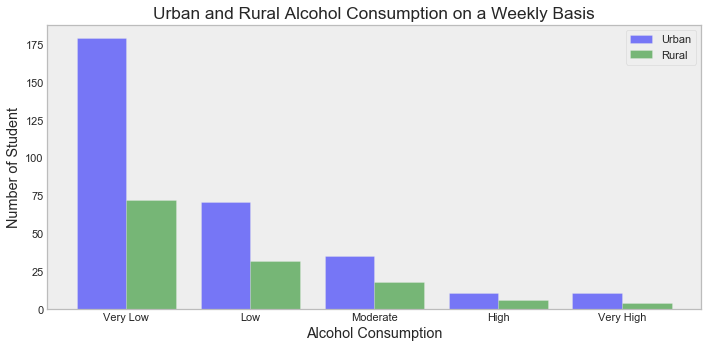

In [68]:
urban_weekday=list(map(lambda l: list(urban.Talc).count(l),l))
rural_weekday=list(map(lambda l: list(rural.Talc).count(l),l))


n = 5
fig, ax = plt.subplots(figsize=(10,5))
i = np.arange(n)   
w = 0.4   

plot1= plt.bar(i, urban_weekday, w, color="blue", alpha=.5)
plot2= plt.bar(i+w, rural_weekday, w, color="green", alpha=.5 )

plt.xlabel('Alcohol Consumption')
plt.ylabel('Number of Student')
plt.title('Urban and Rural Alcohol Consumption on a Weekly Basis')
plt.xticks(i+w/2, labels)
plt.legend((plot1[0],plot2[0]),("Urban","Rural"))
plt.tight_layout()
plt.grid()
plt.show()

In [69]:
d2= {"Feature": ["All Students","Urban Students","Rural Students"],
    "Count": [data.shape[0],urban.shape[0],rural.shape[0]],
    "Average Weekday Alcohol Consumption": [data.Dalc.mean(),urban.Dalc.mean(),rural.Dalc.mean()],
    "Average Weekend Alcohol Consumption": [data.Walc.mean(),urban.Walc.mean(),rural.Walc.mean()],
    "Average Weekly Alcohol Consumption": [data.Talc.mean(),urban.Talc.mean(),rural.Talc.mean()]}

df2=pd.DataFrame(d2)

In [70]:
df2

,Feature,Count,Average Weekday Alcohol Consumption,Average Weekend Alcohol Consumption,Average Weekly Alcohol Consumption
0,All Students,674,1.500000,2.278932,3.778932
1,Urban Students,470,1.472340,2.261702,3.734043
2,Rural Students,204,1.563725,2.318627,3.882353


At a glance, a significant proportion of students in urban settings would associate themselves as light drinkers. A similar trend is true with students in rural areas as well. Based on the quantity of data points, there are more heavy drinkers in the urban than rural areas. If we were to reference the mean, both students in urban and rural areas consume moderate levels of alcohol on a weekly basis. However, it is apparent that students in rural settings consume a higher amount of alcohol on average than the total student population during weekdays and weekends. 

## Conclusion 

__Base on the analysis, we can conclude the following__:

Generally, students tend to consume higher levels of alcohol during weekends. There also appears to be a positive correlation between increased alcohol consumption and age groups. Students in older age groups consume more alcohol on average than younger students. Male students also consume more and higher levels of alcohol than female students throughout the week. The data also shows that on average, students residing in urban settings consume less alcohol than students in rural areas. 

__Limitations__

In terms of analyzing the data, I found that certain variable types were not appropriately assigned. For instance, weekday and weekend alcohol consumption variables were labeled as numeric values. This presented a challenge since the measurements were subjected to a numeric rating system instead of a concrete number of alcohol intake. Establishing a consumption scale based on a more solid measurement, such as the approximate volume of the alcohol container, would have reduced some ambiguity between the subtle differences of what constitutes as a light and moderate drinker. 

Another limitation occurred during the creation of sample data groups.  For example, in determining which age group consumed the most alcohol on a weekly basis, some of the sample groups were significantly small.  Age group 15 to 18 had at least 100 students in each group, while ages 20 and up had less than 10 data points.  I attempted to increase the sample sizes to more accurately represent the student population by reducing the age groups from 7 to 3. 

__Recommendations for further analysis__

With the current information given, I would like to explore how different attributes interact with each other and predict students final grade with certain characteristics. 

 